**Fouille de données et Extraction de Connaissances - Projet final**

Bastien LOM - Walid REHIOUI

Reprise du défi de la conférence ECG 2018 :

Un défi sous le soleil de l’Île de La Réunion


# Partie clustering et prédiction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:


import plotly.express as px

df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

#fig = px.line(df, x='Timestamp', y="FD_Avg")
#fig.show()


In [1]:
fig = px.line(df, x='Timestamp', y="FG_Avg")
fig.show()

NameError: ignored

In [ ]:
#d = datetime(2015, 1, 1, 0, 0,0)
#d_stamp=df[df["Timestamp"]<d ]

#fig = px.line(d_stamp, x='Timestamp', y="FG_Avg")
#fig.show()

# IMPORT DES AUTRES BASES

In [ ]:
df = pd.read_csv("possession_2014_2015.csv")
df1 = pd.read_csv("moufia_2014_2015.csv")
df2 = pd.read_csv("saintandre_2014_2015.csv")
df3 = pd.read_csv("saintleu_2014_2015.csv")
df4 = pd.read_csv("saintpierre_2014_2015.csv")

# EXPLORATION DE LA BASE POSSESSION

In [ ]:
df.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
0,2014-01-01 00:00:00,3.298,1.565,1009.600,62.36666,26.7,139.3986,1.316667
1,2014-01-01 00:01:00,3.466,3.913,1009.600,62.26666,26.7,132.1638,2.200000
2,2014-01-01 00:02:00,0.839,1.453,1009.600,62.03333,26.7,123.2599,1.866667
3,2014-01-01 00:03:00,3.354,1.621,1009.600,61.78333,26.7,122.6728,2.066667
4,2014-01-01 00:04:00,0.894,3.857,1009.533,61.56667,26.7,132.4675,2.116667


In [ ]:
min(df["Patm_Avg"])  ##### y'a des valeurs nulls 

992.4

In [ ]:
max(df["FG_Avg"])

1639.0

In [ ]:
max(df["FD_Avg"])

726.6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049582 entries, 0 to 1049581
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1049582 non-null  object 
 1   FD_Avg             1049582 non-null  float64
 2   FG_Avg             1049582 non-null  float64
 3   Patm_Avg           1049582 non-null  float64
 4   RH_Avg             1049582 non-null  float64
 5   Text_Avg           1049582 non-null  float64
 6   WD_MeanUnitVector  1049582 non-null  float64
 7   WS_Mean            1049582 non-null  float64
dtypes: float64(7), object(1)
memory usage: 64.1+ MB


# HISTOGRAMMES

(array([6.47079e+05, 3.43030e+05, 4.98430e+04, 8.01500e+03, 1.06600e+03,
        3.61000e+02, 1.39000e+02, 3.50000e+01, 1.30000e+01, 1.00000e+00]),
 array([ 0.05    ,  1.848333,  3.646666,  5.444999,  7.243332,  9.041665,
        10.839998, 12.638331, 14.436664, 16.234997, 18.03333 ]),
 <BarContainer object of 10 artists>)

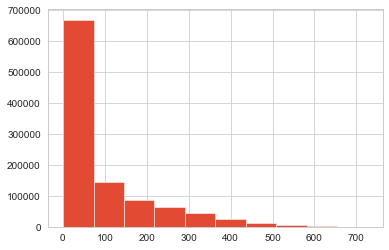

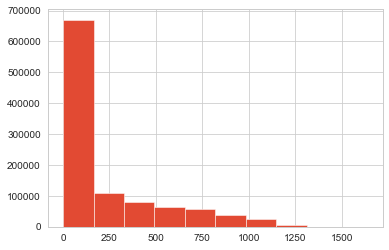

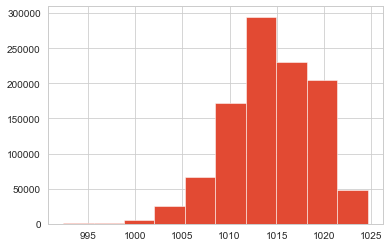

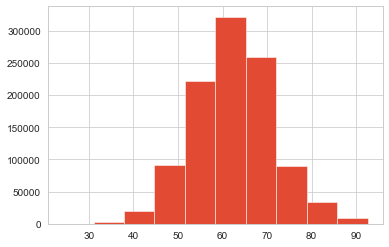

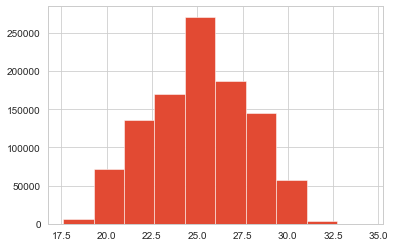

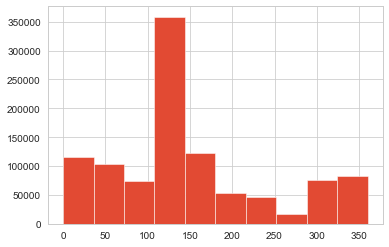

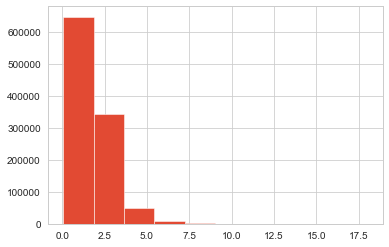

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.hist(x=df["FD_Avg"])
plt.figure(2)
plt.hist(x=df["FG_Avg"])
plt.figure(3)
plt.hist(x=df["Patm_Avg"])
plt.figure(4)
plt.hist(x=df["RH_Avg"])
plt.figure(5)
plt.hist(x=df["Text_Avg"])
plt.figure(6)
plt.hist(x=df["WD_MeanUnitVector"])
plt.figure(7)
plt.hist(x=df["WS_Mean"])

Preprocesing 

In [ ]:
df["Kb"]=(df["FG_Avg"]-df["FD_Avg"])/df["FG_Avg"]

In [ ]:
df1["Kb"]=(df1["FG_Avg"]-df1["FD_Avg"])/df1["FG_Avg"]
df2["Kb"]=(df2["FG_Avg"]-df2["FD_Avg"])/df2["FG_Avg"]
df3["Kb"]=(df3["FG_Avg"]-df3["FD_Avg"])/df3["FG_Avg"]
df4["Kb"]=(df4["FG_Avg"]-df4["FD_Avg"])/df4["FG_Avg"]

In [ ]:
min(df["Kb"])###### des valeurs de Kb négative

-8.241773962804006

In [ ]:
df

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
0,2014-01-01 00:00:00,3.298,1.565,1009.600,62.36666,26.70000,139.39860,1.316667,-1.107348
1,2014-01-01 00:01:00,3.466,3.913,1009.600,62.26666,26.70000,132.16380,2.200000,0.114235
2,2014-01-01 00:02:00,0.839,1.453,1009.600,62.03333,26.70000,123.25990,1.866667,0.422574
3,2014-01-01 00:03:00,3.354,1.621,1009.600,61.78333,26.70000,122.67280,2.066667,-1.069093
4,2014-01-01 00:04:00,0.894,3.857,1009.533,61.56667,26.70000,132.46750,2.116667,0.768214
...,...,...,...,...,...,...,...,...,...
1049577,2015-12-30 23:56:00,5.762,4.028,1010.000,85.05000,22.90000,118.23870,1.266667,-0.430487
1049578,2015-12-30 23:57:00,3.244,4.139,1010.000,85.16666,22.90000,102.99080,1.500000,0.216236
1049579,2015-12-30 23:58:00,3.300,1.566,1009.967,85.16666,22.91666,109.99880,1.500000,-1.107280
1049580,2015-12-30 23:59:00,3.244,3.860,1009.900,85.13333,22.90000,100.68010,1.283333,0.159585


In [ ]:
max(df["Kb"])

0.9471653543307087

In [ ]:
max(df1["Kb"])

397.83098591549305

In [ ]:
df=df[df["Kb"]>=0]###### On enlève les valeurs aberrante

In [ ]:
df1=df1[df1["Kb"]>=0]
df2=df2[df2["Kb"]>=0]
df3=df3[df3["Kb"]>=0]
df4=df4[df4["Kb"]>=0]

In [ ]:
df1=df1[df1["Kb"]<=1]
df2=df2[df2["Kb"]<=1]
df3=df3[df3["Kb"]<=1]
df4=df4[df4["Kb"]<=1]

In [ ]:
min(df["Kb"])

0.0

In [ ]:
df.info()##### On vérifie

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818071 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          818071 non-null  object 
 1   FD_Avg             818071 non-null  float64
 2   FG_Avg             818071 non-null  float64
 3   Patm_Avg           818071 non-null  float64
 4   RH_Avg             818071 non-null  float64
 5   Text_Avg           818071 non-null  float64
 6   WD_MeanUnitVector  818071 non-null  float64
 7   WS_Mean            818071 non-null  float64
 8   Kb                 818071 non-null  float64
dtypes: float64(8), object(1)
memory usage: 62.4+ MB


Les valeurs de Kb qui ne sont pas entre 0 et 1 ont été enlevé ce qui a représenté environ 22%

In [ ]:
max(df["FG_Avg"]) ### La valeur maximal de 1400 est dépassé on a encore des valeurs extrêmes!! On va les enlever

1639.0

In [ ]:
df=df[df["FG_Avg"]<=1400]
df1=df1[df1["FG_Avg"]<=1400]
df2=df2[df2["FG_Avg"]<=1400]
df3=df3[df3["FG_Avg"]<=1400]
df4=df4[df4["FG_Avg"]<=1400]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817956 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          817956 non-null  object 
 1   FD_Avg             817956 non-null  float64
 2   FG_Avg             817956 non-null  float64
 3   Patm_Avg           817956 non-null  float64
 4   RH_Avg             817956 non-null  float64
 5   Text_Avg           817956 non-null  float64
 6   WD_MeanUnitVector  817956 non-null  float64
 7   WS_Mean            817956 non-null  float64
 8   Kb                 817956 non-null  float64
dtypes: float64(8), object(1)
memory usage: 62.4+ MB


On reste au alentours de 22% supprimés

In [ ]:
max(df["FG_Avg"])

1400.0

### Box PLOT

In [ ]:
#plt.boxplot(box_plot_data)

import time
from datetime import datetime


d = datetime(2015, 1, 1, 0, 0,0)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d %H:%M:%S')
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'], format='%Y%m%d %H:%M:%S')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%Y%m%d %H:%M:%S')
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%Y%m%d %H:%M:%S')
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], format='%Y%m%d %H:%M:%S')



d = datetime(2015, 1, 1, 0,0)
P_2014=df[df["Timestamp"]<d ]
P_2015=df[df["Timestamp"]>=d]

M_2014=df1[df1["Timestamp"]<d ]
M_2015=df1[df1["Timestamp"]>=d]


SA_2014=df2[df2["Timestamp"]<d ]
SA_2015=df2[df2["Timestamp"]>=d]


SL_2014=df3[df3["Timestamp"]<d ]
SL_2015=df3[df3["Timestamp"]>=d]

SP_2014=df4[df4["Timestamp"]<d ]
SP_2015=df4[df4["Timestamp"]>=d]

In [ ]:
#### BOX PLOTS POUR KB

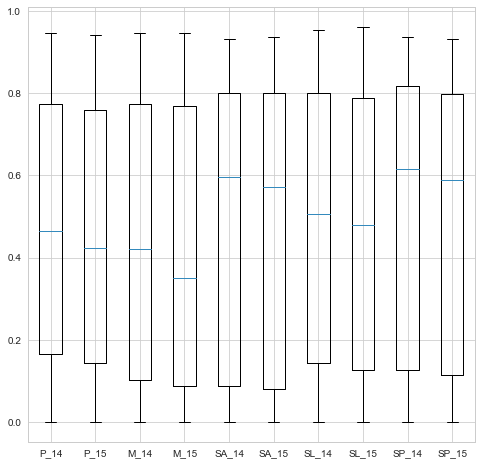

In [ ]:
import matplotlib.pyplot as mp 
import seaborn as sb 
import numpy as np 

box_plot_data=[P_2014["Kb"],P_2015["Kb"],M_2014["Kb"],M_2015["Kb"],SA_2014["Kb"],SA_2015["Kb"],SL_2014["Kb"],SL_2015["Kb"],SP_2014["Kb"],SP_2015["Kb"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

#### BOXPLOT PRESSION ATMOS

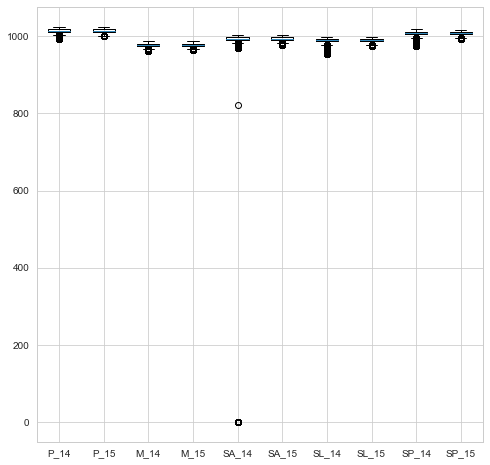

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

On a des valeurs valeurs pour la pression atmorsphérique: elle ne peut pas être nulle


In [ ]:
Q1 = P_2014['Patm_Avg'].quantile(0.25)
Q3 = P_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['Patm_Avg'].quantile(0.25)
Q3 = P_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['Patm_Avg'].quantile(0.25)
Q3 = M_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['Patm_Avg'].quantile(0.25)
Q3 = M_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['Patm_Avg'].quantile(0.25)
Q3 = SA_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['Patm_Avg'].quantile(0.25)
Q3 = SA_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['Patm_Avg'].quantile(0.25)
Q3 = SL_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['Patm_Avg'].quantile(0.25)
Q3 = SL_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['Patm_Avg'].quantile(0.25)
Q3 = SP_2014['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['Patm_Avg'] <= Q3 + 1.5 *IQR)

#SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['Patm_Avg'].quantile(0.25)
Q3 = SP_2015['Patm_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['Patm_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['Patm_Avg'] <= Q3 + 1.5 *IQR)
#SP_2015 = SP_2015.loc[filter2]



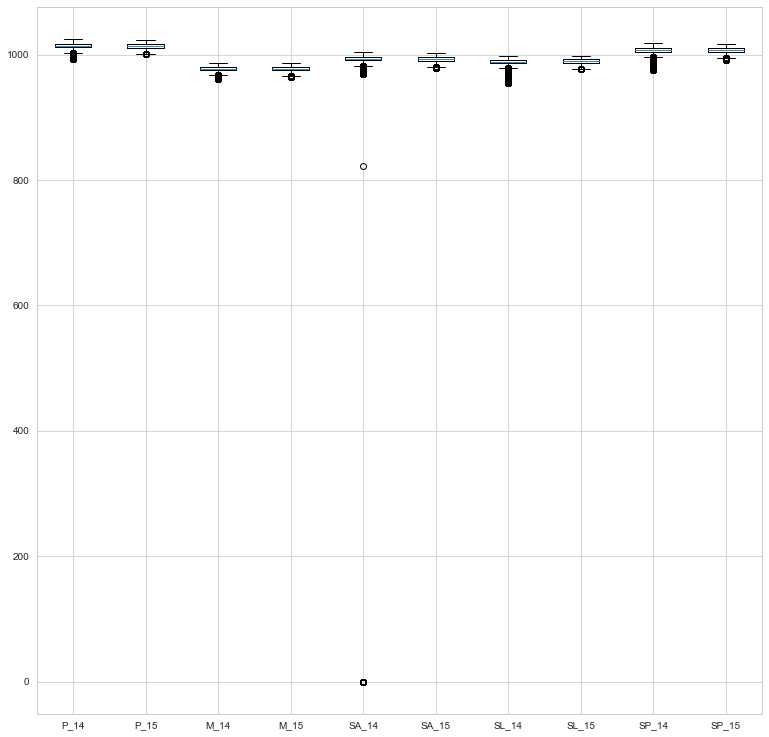

In [ ]:
box_plot_data=[P_2014["Patm_Avg"],P_2015["Patm_Avg"],M_2014["Patm_Avg"],M_2015["Patm_Avg"],SA_2014["Patm_Avg"],SA_2015["Patm_Avg"],SL_2014["Patm_Avg"],SL_2015["Patm_Avg"],SP_2014["Patm_Avg"],SP_2015["Patm_Avg"]]
fig, ax = mp.subplots(figsize=(13, 13))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

#### BOXPLOT PRESSION WS

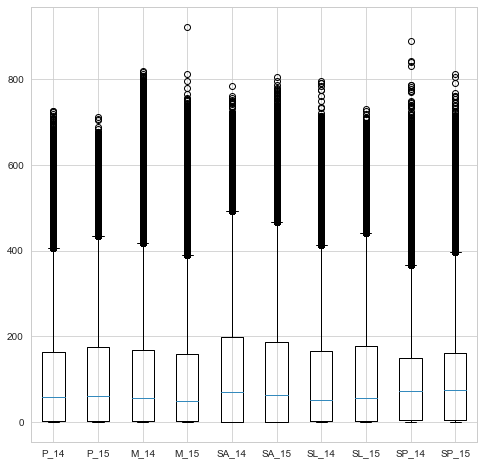

In [ ]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]
fig, ax = mp.subplots(figsize=(8, 8))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

In [ ]:
Q1 = P_2014['FD_Avg'].quantile(0.25)
Q3 = P_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (P_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#P_2014 = P_2014.loc[filter1]  


Q1 = P_2015['FD_Avg'].quantile(0.25)
Q3 = P_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (P_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (P_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#P_2015 = P_2015.loc[filter2]


###### MOUFIA SUPPRESSION DES OUTLIERS




Q1 = M_2014['FD_Avg'].quantile(0.25)
Q3 = M_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (M_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#M_2014 = M_2014.loc[filter1]  


Q1 = M_2015['FD_Avg'].quantile(0.25)
Q3 = M_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (M_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (M_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#M_2015 = M_2015.loc[filter2]




###### SAINT ANDRE SUPPRESSION DES OUTLIERS






Q1 = SA_2014['FD_Avg'].quantile(0.25)
Q3 = SA_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SA_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#SA_2014 = SA_2014.loc[filter1]  


Q1 = SA_2015['FD_Avg'].quantile(0.25)
Q3 = SA_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SA_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SA_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#SA_2015 = SA_2015.loc[filter2]




###### SAINT LE SUPPRESSION DES OUTLIERS


Q1 = SL_2014['FD_Avg'].quantile(0.25)
Q3 = SL_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SL_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

SL_2014 = SL_2014.loc[filter1]  


Q1 = SL_2015['FD_Avg'].quantile(0.25)
Q3 = SL_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SL_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SL_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
SL_2015 = SL_2015.loc[filter2]



###### SAINT PIERRE SUPPRESSION DES OUTLIERS




Q1 = SP_2014['FD_Avg'].quantile(0.25)
Q3 = SP_2014['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter1 = (SP_2014['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2014['FD_Avg'] <= Q3 + 1.5 *IQR)

#SP_2014 = SP_2014.loc[filter1]  


Q1 = SP_2015['FD_Avg'].quantile(0.25)
Q3 = SP_2015['FD_Avg'].quantile(0.75)
IQR = Q3 - Q1    

filter2 = (SP_2015['FD_Avg'] >= Q1 - 1.5 * IQR) & (SP_2015['FD_Avg'] <= Q3 + 1.5 *IQR)
#SP_2015 = SP_2015.loc[filter2]

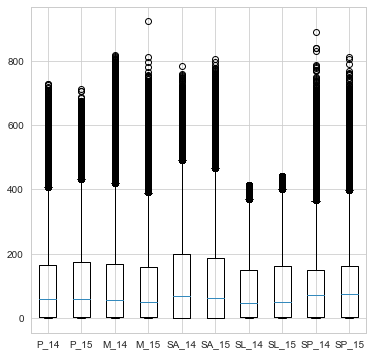

In [ ]:
box_plot_data=[P_2014["FD_Avg"],P_2015["FD_Avg"],M_2014["FD_Avg"],M_2015["FD_Avg"],SA_2014["FD_Avg"],SA_2015["FD_Avg"],SL_2014["FD_Avg"],SL_2015["FD_Avg"],SP_2014["FD_Avg"],SP_2015["FD_Avg"]]
fig, ax = mp.subplots(figsize=(6, 6))
mp.boxplot(box_plot_data,labels=['P_14','P_15','M_14','M_15','SA_14','SA_15','SL_14','SL_15','SP_14','SP_15'])

#mp.boxplot(P_2014[5])
mp.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817956 entries, 1 to 1049580
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Timestamp          817956 non-null  datetime64[ns]
 1   FD_Avg             817956 non-null  float64       
 2   FG_Avg             817956 non-null  float64       
 3   Patm_Avg           817956 non-null  float64       
 4   RH_Avg             817956 non-null  float64       
 5   Text_Avg           817956 non-null  float64       
 6   WD_MeanUnitVector  817956 non-null  float64       
 7   WS_Mean            817956 non-null  float64       
 8   Kb                 817956 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 62.4 MB


In [ ]:
df.corr()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
FD_Avg,1.000000,0.665849,-0.065834,-0.263602,0.503175,0.168593,0.356540,-0.164625
FG_Avg,0.665849,1.000000,-0.006609,-0.408678,0.517321,0.193735,0.432671,0.430714
Patm_Avg,-0.065834,-0.006609,1.000000,-0.408160,-0.569739,0.170396,-0.139141,0.067141
RH_Avg,-0.263602,-0.408678,-0.408160,1.000000,-0.051437,-0.297828,-0.133448,-0.217456
Text_Avg,0.503175,0.517321,-0.569739,-0.051437,1.000000,0.056751,0.297286,0.071763
WD_MeanUnitVector,0.168593,0.193735,0.170396,-0.297828,0.056751,1.000000,-0.023909,0.045008
WS_Mean,0.356540,0.432671,-0.139141,-0.133448,0.297286,-0.023909,1.000000,0.088447
Kb,-0.164625,0.430714,0.067141,-0.217456,0.071763,0.045008,0.088447,1.000000


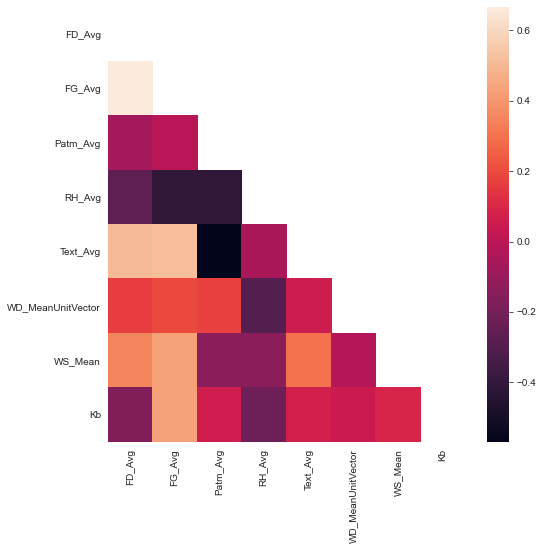

In [ ]:
import matplotlib.pyplot as mp 
import seaborn as sb 
import numpy as np 


fig, ax = mp.subplots(figsize=(8, 8))
#mask = np.triu(np.ones_like(df.corr())) 
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
  
# plotting a triangle correlation heatmap 
dataplot = sb.heatmap(df.corr(), mask=mask, ax=ax) 
  
# displaying heatmap 
#mp.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler
### on normalise les données dabord
d = datetime(2015, 1, 1, 0, 0,0)
d_stamp=df[df["Timestamp"]<d ]
d_stamp=d_stamp.drop(["Timestamp"],axis=1)
d_stamp = MinMaxScaler().fit_transform(d_stamp)

d_stamp2=df[df["Timestamp"]>=d ]
d_stamp2=d_stamp2.drop(["Timestamp"],axis=1)
d_stamp2 = MinMaxScaler().fit_transform(d_stamp2)

Myseries=[d_stamp,d_stamp2]

In [ ]:
len(d_stamp)

410613

In [ ]:
from sklearn.preprocessing import StandardScaler
d = datetime(2015, 1, 1, 0, 0,0)
d_stamp=df[df["Timestamp"]<d ]
d_stamp=d_stamp.drop(["Timestamp"],axis=1)
d_stamp = StandardScaler().fit_transform(d_stamp)
d_stamp

array([[-0.80325464, -0.82872886, -1.00891568, ..., -0.20211754,
         0.14128697, -1.12471751],
       [-0.82449514, -0.83637408, -1.00891568, ..., -0.28858489,
        -0.14215757, -0.11777481],
       [-0.82405044, -0.8289029 , -1.02358453, ..., -0.19916825,
         0.07042605,  1.01097924],
       ...,
       [-0.80416829, -0.82716873, -1.14027853, ..., -0.89814721,
        -0.08546917, -0.71223071],
       [-0.82178651, -0.82786489, -1.14750349, ..., -0.88220253,
        -0.39725792,  0.85312296],
       [-0.82178651, -0.82803892, -1.16217234, ..., -0.9541941 ,
         0.12711444,  0.84073389]])

In [ ]:
d_stamp

array([[-0.80325464, -0.82872886, -1.00891568, ..., -0.20211754,
         0.14128697, -1.12471751],
       [-0.82449514, -0.83637408, -1.00891568, ..., -0.28858489,
        -0.14215757, -0.11777481],
       [-0.82405044, -0.8289029 , -1.02358453, ..., -0.19916825,
         0.07042605,  1.01097924],
       ...,
       [-0.80416829, -0.82716873, -1.14027853, ..., -0.89814721,
        -0.08546917, -0.71223071],
       [-0.82178651, -0.82786489, -1.14750349, ..., -0.88220253,
        -0.39725792,  0.85312296],
       [-0.82178651, -0.82803892, -1.16217234, ..., -0.9541941 ,
         0.12711444,  0.84073389]])

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")
moufia = pd.read_csv("moufia_2014_2015.csv")


In [ ]:
possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]

In [ ]:
possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')

In [ ]:
possession=possession.drop(["FG_Avg","FD_Avg"],axis=1)

In [ ]:
possession=possession.set_index('Timestamp')

In [ ]:
possession=possession.resample('60T', label='right').sum()

In [ ]:
possession

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,
2014-01-01 01:00:00,60557.800,3715.19987,1606.00001,6595.04774,84.966668,1.424989
2014-01-01 02:00:00,60515.818,4048.03326,1603.63331,7367.82558,59.466668,4.038652
2014-01-01 03:00:00,60484.334,4061.16660,1588.18333,7280.81388,58.266665,3.473149
2014-01-01 04:00:00,60492.167,3872.96660,1603.68333,6273.77452,89.383337,10.098330
2014-01-01 05:00:00,60495.334,3582.98315,1641.49997,6810.75280,90.183333,16.636588
...,...,...,...,...,...,...
2015-12-30 21:00:00,60596.384,5136.71656,1423.49999,8768.41300,65.233334,-18.202763
2015-12-30 22:00:00,60625.282,5019.79985,1410.48333,8328.05170,68.983333,-6.495903
2015-12-30 23:00:00,60648.199,5050.38329,1400.73333,8852.91530,55.549998,-14.508907


In [ ]:
possession['Timestamp']=pd.to_datetime(possession['Timestamp'])
data_hourly_possession = possession.resample('H',on='Timestamp').mean()

In [ ]:
data_hourly_possession=data_hourly_possession[data_hourly_possession["Kb"]>=0]

In [ ]:
data_hourly_possession=data_hourly_possession[data_hourly_possession["Kb"]<=1]

In [ ]:
data_hourly_possession["Kb_H-1"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-2"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-3"]=data_hourly_possession["Kb"]

In [ ]:
data_hourly_possession["FD_H-1"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-2"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-3"]=data_hourly_possession["FD_Avg"]

In [ ]:
data_hourly_possession["FG_H-1"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-2"]=data_hourly_possession["FG_Avg"]
data_hourly_possession["FG_H-3"]=data_hourly_possession["FG_Avg"]

In [ ]:
data_hourly_possession["Patm_H-1"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-2"]=data_hourly_possession["Patm_Avg"]
data_hourly_possession["Patm_H-3"]=data_hourly_possession["Patm_Avg"]

In [ ]:
data_hourly_possession["RH_H-1"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-2"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-3"]=data_hourly_possession["RH_Avg"]

In [ ]:
data_hourly_possession["Text_H-1"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-2"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-3"]=data_hourly_possession["Text_Avg"]

In [ ]:
data_hourly_possession["WD_MeanUnitVector_H-1"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-2"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-3"]=data_hourly_possession["WD_MeanUnitVector"]

In [ ]:
data_hourly_possession["WS_Mean_H-1"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-2"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-3"]=data_hourly_possession["WS_Mean"]

In [ ]:
data_hourly_possession.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb,Kb_H-1,Kb_H-2,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.222033,2.935683,1009.296667,61.919998,26.766667,109.917462,1.416111,0.023750,0.023750,0.023750,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
2014-01-01 01:00:00,2.246267,3.341867,1008.596967,67.467221,26.727222,122.797093,0.991111,0.067311,0.067311,0.067311,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2014-01-01 02:00:00,2.241650,3.145383,1008.072233,67.686110,26.469722,121.346898,0.971111,0.057886,0.057886,0.057886,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
2014-01-01 03:00:00,2.317033,3.431500,1008.202783,64.549443,26.728055,104.562909,1.489722,0.168305,0.168305,0.168305,...,64.549443,26.728055,26.728055,26.728055,104.562909,104.562909,104.562909,1.489722,1.489722,1.489722
2014-01-01 04:00:00,2.668283,4.268900,1008.255567,59.716386,27.358333,113.512547,1.503056,0.277276,0.277276,0.277276,...,59.716386,27.358333,27.358333,27.358333,113.512547,113.512547,113.512547,1.503056,1.503056,1.503056


In [ ]:
data_hourly_possession.reset_index(inplace=True)

In [ ]:
data_hourly_possession

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb,Kb_H-1,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
0,2014-01-01 00:00:00,2.222033,2.935683,1009.296667,61.919998,26.766667,109.917462,1.416111,0.023750,0.023750,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
1,2014-01-01 01:00:00,2.246267,3.341867,1008.596967,67.467221,26.727222,122.797093,0.991111,0.067311,0.067311,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2,2014-01-01 02:00:00,2.241650,3.145383,1008.072233,67.686110,26.469722,121.346898,0.971111,0.057886,0.057886,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
3,2014-01-01 03:00:00,2.317033,3.431500,1008.202783,64.549443,26.728055,104.562909,1.489722,0.168305,0.168305,...,64.549443,26.728055,26.728055,26.728055,104.562909,104.562909,104.562909,1.489722,1.489722,1.489722
4,2014-01-01 04:00:00,2.668283,4.268900,1008.255567,59.716386,27.358333,113.512547,1.503056,0.277276,0.277276,...,59.716386,27.358333,27.358333,27.358333,113.512547,113.512547,113.512547,1.503056,1.503056,1.503056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2015-12-30 14:00:00,90.059000,91.506833,1009.799983,71.137777,27.129722,175.359822,1.439167,0.016568,0.016568,...,71.137777,27.129722,27.129722,27.129722,175.359822,175.359822,175.359822,1.439167,1.439167,1.439167
10331,2015-12-30 15:00:00,68.788667,69.491333,1009.356683,74.377220,26.141111,173.841727,1.295556,0.009418,0.009418,...,74.377220,26.141111,26.141111,26.141111,173.841727,173.841727,173.841727,1.295556,1.295556,1.295556
10332,2015-12-30 16:00:00,37.971500,39.594667,1009.150283,80.799165,24.839166,138.633123,1.070833,0.038894,0.038894,...,80.799165,24.839166,24.839166,24.839166,138.633123,138.633123,138.633123,1.070833,1.070833,1.070833
10333,2015-12-30 17:00:00,27.226000,28.889500,1009.131967,83.684720,24.431944,142.072356,0.841111,0.057609,0.057609,...,83.684720,24.431944,24.431944,24.431944,142.072356,142.072356,142.072356,0.841111,0.841111,0.841111


In [ ]:
data_hourly_possession.loc[1,"Kb"]

0.06731087079292197

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Kb_H-1"]=data_hourly_possession.loc[i-1,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-2"]=data_hourly_possession.loc[i-2,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-3"]=data_hourly_possession.loc[i-3,"Kb"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"FD_H-1"]=data_hourly_possession.loc[i-1,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-2"]=data_hourly_possession.loc[i-2,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-3"]=data_hourly_possession.loc[i-3,"FD_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"FG_H-1"]=data_hourly_possession.loc[i-1,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-2"]=data_hourly_possession.loc[i-2,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-3"]=data_hourly_possession.loc[i-3,"FG_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Patm_H-1"]=data_hourly_possession.loc[i-1,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-2"]=data_hourly_possession.loc[i-2,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-3"]=data_hourly_possession.loc[i-3,"Patm_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"RH_H-1"]=data_hourly_possession.loc[i-1,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-2"]=data_hourly_possession.loc[i-2,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-3"]=data_hourly_possession.loc[i-3,"RH_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"Text_H-1"]=data_hourly_possession.loc[i-1,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-2"]=data_hourly_possession.loc[i-2,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-3"]=data_hourly_possession.loc[i-3,"Text_Avg"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-1"]=data_hourly_possession.loc[i-1,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-2"]=data_hourly_possession.loc[i-2,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-3"]=data_hourly_possession.loc[i-3,"WD_MeanUnitVector"]

In [ ]:
for i in range(3,10335):
    data_hourly_possession.loc[i,"WS_Mean_H-1"]=data_hourly_possession.loc[i-1,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-2"]=data_hourly_possession.loc[i-2,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-3"]=data_hourly_possession.loc[i-3,"WS_Mean"]

In [ ]:
scalar=data_hourly_possession

In [ ]:
scalar=scalar.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar

,Timestamp,Kb,Kb_H-1,Kb_H-2,Kb_H-3,FD_H-1,FD_H-2,FD_H-3,FG_H-1,FG_H-2,...,RH_H-3,Text_H-1,Text_H-2,Text_H-3,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3
0,2014-01-01 00:00:00,0.023750,0.023750,0.023750,0.023750,2.222033,2.222033,2.222033,2.935683,2.935683,...,61.919998,26.766667,26.766667,26.766667,109.917462,109.917462,109.917462,1.416111,1.416111,1.416111
1,2014-01-01 01:00:00,0.067311,0.067311,0.067311,0.067311,2.246267,2.246267,2.246267,3.341867,3.341867,...,67.467221,26.727222,26.727222,26.727222,122.797093,122.797093,122.797093,0.991111,0.991111,0.991111
2,2014-01-01 02:00:00,0.057886,0.057886,0.057886,0.057886,2.241650,2.241650,2.241650,3.145383,3.145383,...,67.686110,26.469722,26.469722,26.469722,121.346898,121.346898,121.346898,0.971111,0.971111,0.971111
3,2014-01-01 03:00:00,0.168305,0.057886,0.067311,0.023750,2.241650,2.246267,2.222033,3.145383,3.341867,...,61.919998,26.469722,26.727222,26.766667,121.346898,122.797093,109.917462,0.971111,0.991111,1.416111
4,2014-01-01 04:00:00,0.277276,0.168305,0.057886,0.067311,2.317033,2.241650,2.246267,3.431500,3.145383,...,67.467221,26.728055,26.469722,26.727222,104.562909,121.346898,122.797093,1.489722,0.971111,0.991111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,2015-12-30 14:00:00,0.016568,0.006368,0.021134,0.021968,119.536667,116.435000,176.926667,120.318333,118.915000,...,54.430554,27.642777,28.343333,29.238611,134.023886,81.965569,64.173795,1.412500,2.021389,2.522222
10331,2015-12-30 15:00:00,0.009418,0.016568,0.006368,0.021134,90.059000,119.536667,116.435000,91.506833,120.318333,...,58.044997,27.129722,27.642777,28.343333,175.359822,134.023886,81.965569,1.439167,1.412500,2.021389
10332,2015-12-30 16:00:00,0.038894,0.009418,0.016568,0.006368,68.788667,90.059000,119.536667,69.491333,91.506833,...,65.018609,26.141111,27.129722,27.642777,173.841727,175.359822,134.023886,1.295556,1.439167,1.412500
10333,2015-12-30 17:00:00,0.057609,0.038894,0.009418,0.016568,37.971500,68.788667,90.059000,39.594667,69.491333,...,71.137777,24.839166,26.141111,27.129722,138.633123,173.841727,175.359822,1.070833,1.295556,1.439167


In [ ]:
scalar = scalar.drop(index=[0,1,2])

In [ ]:
X=scalar.iloc[:,2:]
y=scalar.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

0.6397644527740285

# arbre de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
reg.score(X_test, y_test)

0.4225608011812484

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.7146152766269662

# SI ON SUPPRIME DABOR LES VALEURS ABERRANTES

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")


possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]


possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')

possession=possession[possession["Kb"]>=0]

possession=possession[possession["Kb"]<=1]

data_hourly_possession = possession.resample('H',on='Timestamp').mean()

In [ ]:
data_hourly_possession

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,,,
2014-01-01 00:00:00,1.386857,3.247548,1009.303571,61.773807,26.765080,110.761730,1.483333,0.514160
2014-01-01 01:00:00,1.630000,3.890114,1008.577295,67.603787,26.731439,124.160171,1.010985,0.554001
2014-01-01 02:00:00,1.693977,3.684302,1008.070535,67.656588,26.485659,123.007079,0.972868,0.523351
2014-01-01 03:00:00,1.868633,3.698735,1008.212571,64.755781,26.704082,105.846443,1.473469,0.472016
2014-01-01 04:00:00,2.297480,4.522300,1008.239000,59.488997,27.396999,109.499254,1.505333,0.458753
...,...,...,...,...,...,...,...,...
2015-12-30 19:00:00,2.168639,4.250333,1009.735667,86.338886,24.047685,161.545603,1.205555,0.454577
2015-12-30 20:00:00,2.417000,4.576121,1009.933848,85.619695,23.747475,147.995273,1.130808,0.450012
2015-12-30 21:00:00,2.621023,4.758488,1010.377116,83.577517,23.522480,142.844384,1.137209,0.441002


In [ ]:
data_hourly_possession["Kb_H-1"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-2"]=data_hourly_possession["Kb"]
data_hourly_possession["Kb_H-3"]=data_hourly_possession["Kb"]

In [ ]:
data_hourly_possession["FD_H-1"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-2"]=data_hourly_possession["FD_Avg"]
data_hourly_possession["FD_H-3"]=data_hourly_possession["FD_Avg"]

In [ ]:
data_hourly_possession1["FG_H-1"]=data_hourly_possession1["FG_Avg"]
data_hourly_possession1["FG_H-2"]=data_hourly_possession1["FG_Avg"]
data_hourly_possession1["FG_H-3"]=data_hourly_possession1["FG_Avg"]

NameError: name 'data_hourly_possession1' is not defined

In [ ]:
data_hourly_possession1["Patm_H-1"]=data_hourly_possession1["Patm_Avg"]
data_hourly_possession1["Patm_H-2"]=data_hourly_possession1["Patm_Avg"]
data_hourly_possession1["Patm_H-3"]=data_hourly_possession1["Patm_Avg"]

In [ ]:
data_hourly_possession["RH_H-1"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-2"]=data_hourly_possession["RH_Avg"]
data_hourly_possession["RH_H-3"]=data_hourly_possession["RH_Avg"]

In [ ]:
data_hourly_possession["Text_H-1"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-2"]=data_hourly_possession["Text_Avg"]
data_hourly_possession["Text_H-3"]=data_hourly_possession["Text_Avg"]

In [ ]:
data_hourly_possession["WD_MeanUnitVector_H-1"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-2"]=data_hourly_possession["WD_MeanUnitVector"]
data_hourly_possession["WD_MeanUnitVector_H-3"]=data_hourly_possession["WD_MeanUnitVector"]

In [ ]:
data_hourly_possession["WS_Mean_H-1"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-2"]=data_hourly_possession["WS_Mean"]
data_hourly_possession["WS_Mean_H-3"]=data_hourly_possession["WS_Mean"]

In [ ]:
data_hourly_possession.reset_index(inplace=True)

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Kb_H-1"]=data_hourly_possession.loc[i-1,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-2"]=data_hourly_possession.loc[i-2,"Kb"]
    data_hourly_possession.loc[i,"Kb_H-3"]=data_hourly_possession.loc[i-3,"Kb"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FD_H-1"]=data_hourly_possession.loc[i-1,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-2"]=data_hourly_possession.loc[i-2,"FD_Avg"]
    data_hourly_possession.loc[i,"FD_H-3"]=data_hourly_possession.loc[i-3,"FD_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"FG_H-1"]=data_hourly_possession.loc[i-1,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-2"]=data_hourly_possession.loc[i-2,"FG_Avg"]
    data_hourly_possession.loc[i,"FG_H-3"]=data_hourly_possession.loc[i-3,"FG_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Patm_H-1"]=data_hourly_possession.loc[i-1,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-2"]=data_hourly_possession.loc[i-2,"Patm_Avg"]
    data_hourly_possession.loc[i,"Patm_H-3"]=data_hourly_possession.loc[i-3,"Patm_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"RH_H-1"]=data_hourly_possession.loc[i-1,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-2"]=data_hourly_possession.loc[i-2,"RH_Avg"]
    data_hourly_possession.loc[i,"RH_H-3"]=data_hourly_possession.loc[i-3,"RH_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"Text_H-1"]=data_hourly_possession.loc[i-1,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-2"]=data_hourly_possession.loc[i-2,"Text_Avg"]
    data_hourly_possession.loc[i,"Text_H-3"]=data_hourly_possession.loc[i-3,"Text_Avg"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-1"]=data_hourly_possession.loc[i-1,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-2"]=data_hourly_possession.loc[i-2,"WD_MeanUnitVector"]
    data_hourly_possession.loc[i,"WD_MeanUnitVector_H-3"]=data_hourly_possession.loc[i-3,"WD_MeanUnitVector"]

In [ ]:
for i in range(3,17496):
    data_hourly_possession.loc[i,"WS_Mean_H-1"]=data_hourly_possession.loc[i-1,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-2"]=data_hourly_possession.loc[i-2,"WS_Mean"]
    data_hourly_possession.loc[i,"WS_Mean_H-3"]=data_hourly_possession.loc[i-3,"WS_Mean"]

In [ ]:
scalar2=data_hourly_possession

In [ ]:
scalar2=scalar2.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar2 = scalar2.drop(index=[0,1,2])

In [ ]:
X=scalar2.iloc[:,2:]
y=scalar2.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

0.5845385382791575

In [ ]:
reg.score(X_train, y_train)

0.5826167536522546

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6786458538681575

In [ ]:
reg.score(X_train, y_train)

0.955025326311397

In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    MLPRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 3

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-5 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     CV-5 R2:  0.67 (+/- 0.01)
XGBRegressor              CV-5 R2:  0.64 (+/- 0.02)
MLPRegressor              CV-5 R2:  -34.43 (+/- 31.57)
Ridge                     CV-5 R2:  0.58 (+/- 0.01)
DecisionTreeRegressor     CV-5 R2:  0.36 (+/- 0.04)
BayesianRidge             CV-5 R2:  0.58 (+/- 0.01)
ExtraTreesRegressor       CV-5 R2:  0.67 (+/- 0.02)
ElasticNet                CV-5 R2:  0.47 (+/- 0.03)
KNeighborsRegressor       CV-5 R2:  0.55 (+/- 0.01)
GradientBoostingRegressor CV-5 R2:  0.66 (+/- 0.02)


In [ ]:
import pandas as pd
from fbprophet import Prophet
X_train = data_hourly_possession[:-5000]
X_test = data_hourly_possession[-5000:]
X_train["y"]= X_train["Kb"]
X_train["ds"]=X_train["Timestamp"]
#X_train = X_train.drop('FG_Avg', 1)
X_train = X_train.drop('Timestamp',1)
m = Prophet()
m.add_regressor("FD_Avg")
m.add_regressor("FG_Avg")
m.add_regressor("Patm_Avg")
m.add_regressor("RH_Avg")
m.add_regressor("Text_Avg")
m.add_regressor("WD_MeanUnitVector")
m.add_regressor("WS_Mean")

m.fit(X_train)

KeyError: 'Timestamp'

###################################################################################

In [ ]:
features=possession.columns

features=['Patm_Avg', 'RH_Avg', 'Text_Avg', 'WD_MeanUnitVector',
       'WS_Mean', 'Kb']

In [ ]:
##############################################################################################""

In [ ]:
possession = pd.read_csv("possession_2014_2015.csv")


possession["Kb"]=(possession["FG_Avg"]-possession["FD_Avg"])/possession["FG_Avg"]


possession['Timestamp'] = pd.to_datetime(possession['Timestamp'], format='%Y%m%d %H:%M:%S')

possession=possession[possession["Kb"]>=0]

possession=possession[possession["Kb"]<=1]

df = possession.resample('H',on='Timestamp').mean()

In [ ]:
df["Kb_H-1"]=df["Kb"]
df["Kb_H-2"]=df["Kb"]
df["Kb_H-3"]=df["Kb"]
df["Kb_H-4"]=df["Kb"]

In [ ]:
df["FD_H-1"]=df["FD_Avg"]
df["FD_H-2"]=df["FD_Avg"]
df["FD_H-3"]=df["FD_Avg"]
df["FD_H-4"]=df["FD_Avg"]

In [ ]:
df["FG_H-1"]=df["FG_Avg"]
df["FG_H-2"]=df["FG_Avg"]
df["FG_H-3"]=df["FG_Avg"]
df["FG_H-4"]=df["FG_Avg"]

In [ ]:
df["Patm_H-1"]=df["Patm_Avg"]
df["Patm_H-2"]=df["Patm_Avg"]
df["Patm_H-3"]=df["Patm_Avg"]
df["Patm_H-4"]=df["Patm_Avg"]

In [ ]:
df["RH_H-1"]=df["RH_Avg"]
df["RH_H-2"]=df["RH_Avg"]
df["RH_H-3"]=df["RH_Avg"]
df["RH_H-4"]=df["RH_Avg"]

In [ ]:
df["Text_H-1"]=df["Text_Avg"]
df["Text_H-2"]=df["Text_Avg"]
df["Text_H-3"]=df["Text_Avg"]
df["Text_H-4"]=df["Text_Avg"]

In [ ]:
df["WD_MeanUnitVector_H-1"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-2"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-3"]=df["WD_MeanUnitVector"]
df["WD_MeanUnitVector_H-4"]=df["WD_MeanUnitVector"]

In [ ]:
df["WS_Mean_H-1"]=df["WS_Mean"]
df["WS_Mean_H-2"]=df["WS_Mean"]
df["WS_Mean_H-3"]=df["WS_Mean"]
df["WS_Mean_H-4"]=df["WS_Mean"]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
for i in range(4,17496):
    df.loc[i,"Kb_H-1"]=df.loc[i-1,"Kb"]
    df.loc[i,"Kb_H-2"]=df.loc[i-2,"Kb"]
    df.loc[i,"Kb_H-3"]=df.loc[i-3,"Kb"]
    df.loc[i,"Kb_H-4"]=df.loc[i-4,"Kb"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"FD_H-1"]=df.loc[i-1,"FD_Avg"]
    df.loc[i,"FD_H-2"]=df.loc[i-2,"FD_Avg"]
    df.loc[i,"FD_H-3"]=df.loc[i-3,"FD_Avg"]
    df.loc[i,"FD_H-4"]=df.loc[i-4,"FD_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"FG_H-1"]=df.loc[i-1,"FG_Avg"]
    df.loc[i,"FG_H-2"]=df.loc[i-2,"FG_Avg"]
    df.loc[i,"FG_H-3"]=df.loc[i-3,"FG_Avg"]
    df.loc[i,"FG_H-4"]=df.loc[i-4,"FG_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"Patm_H-1"]=df.loc[i-1,"Patm_Avg"]
    df.loc[i,"Patm_H-2"]=df.loc[i-2,"Patm_Avg"]
    df.loc[i,"Patm_H-3"]=df.loc[i-3,"Patm_Avg"]
    df.loc[i,"Patm_H-4"]=df.loc[i-4,"Patm_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"RH_H-1"]=df.loc[i-1,"RH_Avg"]
    df.loc[i,"RH_H-2"]=df.loc[i-2,"RH_Avg"]
    df.loc[i,"RH_H-3"]=df.loc[i-3,"RH_Avg"]
    df.loc[i,"RH_H-4"]=df.loc[i-4,"RH_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"Text_H-1"]=df.loc[i-1,"Text_Avg"]
    df.loc[i,"Text_H-2"]=df.loc[i-2,"Text_Avg"]
    df.loc[i,"Text_H-3"]=df.loc[i-3,"Text_Avg"]
    df.loc[i,"Text_H-4"]=df.loc[i-4,"Text_Avg"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"WD_MeanUnitVector_H-1"]=df.loc[i-1,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-2"]=df.loc[i-2,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-3"]=df.loc[i-3,"WD_MeanUnitVector"]
    df.loc[i,"WD_MeanUnitVector_H-4"]=df.loc[i-4,"WD_MeanUnitVector"]

In [ ]:
for i in range(4,17496):
    df.loc[i,"WS_Mean_H-1"]=df.loc[i-1,"WS_Mean"]
    df.loc[i,"WS_Mean_H-2"]=df.loc[i-2,"WS_Mean"]
    df.loc[i,"WS_Mean_H-3"]=df.loc[i-3,"WS_Mean"]
    df.loc[i,"WS_Mean_H-4"]=df.loc[i-4,"WS_Mean"]

In [ ]:
scalar2=df

In [ ]:
scalar2=scalar2.drop(["FG_Avg","FD_Avg","WS_Mean","WD_MeanUnitVector","Text_Avg","RH_Avg","FG_Avg","FD_Avg","Patm_Avg"],axis=1)

In [ ]:
scalar2.head()

,Timestamp,Kb,Kb_H-1,Kb_H-2,Kb_H-3,Kb_H-4,FD_H-1,FD_H-2,FD_H-3,FD_H-4,...,Text_H-3,Text_H-4,WD_MeanUnitVector_H-1,WD_MeanUnitVector_H-2,WD_MeanUnitVector_H-3,WD_MeanUnitVector_H-4,WS_Mean_H-1,WS_Mean_H-2,WS_Mean_H-3,WS_Mean_H-4
0,2014-01-01 00:00:00,0.514160,0.514160,0.514160,0.514160,0.514160,1.386857,1.386857,1.386857,1.386857,...,26.765080,26.765080,110.761730,110.761730,110.761730,110.761730,1.483333,1.483333,1.483333,1.483333
1,2014-01-01 01:00:00,0.554001,0.554001,0.554001,0.554001,0.554001,1.630000,1.630000,1.630000,1.630000,...,26.731439,26.731439,124.160171,124.160171,124.160171,124.160171,1.010985,1.010985,1.010985,1.010985
2,2014-01-01 02:00:00,0.523351,0.523351,0.523351,0.523351,0.523351,1.693977,1.693977,1.693977,1.693977,...,26.485659,26.485659,123.007079,123.007079,123.007079,123.007079,0.972868,0.972868,0.972868,0.972868
3,2014-01-01 03:00:00,0.472016,0.472016,0.472016,0.472016,0.472016,1.868633,1.868633,1.868633,1.868633,...,26.704082,26.704082,105.846443,105.846443,105.846443,105.846443,1.473469,1.473469,1.473469,1.473469
4,2014-01-01 04:00:00,0.458753,0.472016,0.523351,0.554001,0.514160,1.868633,1.693977,1.630000,1.386857,...,26.731439,26.765080,105.846443,123.007079,124.160171,110.761730,1.473469,0.972868,1.010985,1.483333


In [ ]:
scalar2 = scalar2.drop(index=[0,1,2,3])

In [ ]:
X=scalar2.iloc[:,2:]
y=scalar2.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6054592158474978

In [ ]:
reg.score(X_train, y_train)

0.5786380288364977

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, y_train)

reg.score(X_test, y_test)

0.6980740961167757

In [ ]:
reg.score(X_train, y_train)

0.955182797055469

In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
model_factory = [
    RandomForestRegressor(),
    XGBRegressor(nthread=1),
    MLPRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    BayesianRidge(),
    ExtraTreesRegressor(),
    ElasticNet(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

for model in model_factory:
    model.seed = 42
    num_folds = 4

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2', n_jobs=8)
    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

    print('{model:25} CV-5 R2: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

RandomForestRegressor     CV-5 R2:  0.68 (+/- 0.02)
XGBRegressor              CV-5 R2:  0.64 (+/- 0.04)
MLPRegressor              CV-5 R2:  -40.64 (+/- 67.42)
Ridge                     CV-5 R2:  0.58 (+/- 0.03)
DecisionTreeRegressor     CV-5 R2:  0.35 (+/- 0.02)
BayesianRidge             CV-5 R2:  0.58 (+/- 0.03)
ExtraTreesRegressor       CV-5 R2:  0.68 (+/- 0.03)
ElasticNet                CV-5 R2:  0.47 (+/- 0.03)
KNeighborsRegressor       CV-5 R2:  0.55 (+/- 0.02)
GradientBoostingRegressor CV-5 R2:  0.66 (+/- 0.02)


### CLUSTERING

Clustering par heure

In [2]:
import pandas as pd

possession_cluster = pd.read_csv("possession_2014_2015.csv")
possession_cluster["Kb"]=(possession_cluster["FG_Avg"]-possession_cluster["FD_Avg"])/possession_cluster["FG_Avg"]

possession_cluster['Timestamp'] = pd.to_datetime(possession_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

data_hourly_possession_cluster = possession_cluster.resample('H',on='Timestamp').mean()

data_hourly_possession_cluster=data_hourly_possession_cluster[data_hourly_possession_cluster["Kb"]>=0]
data_hourly_possession_cluster=data_hourly_possession_cluster[data_hourly_possession_cluster["Kb"]<=1]

In [18]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

data_hourly_possession_cluster = StandardScaler().fit_transform(data_hourly_possession_cluster)

print("Kmeans : \n")
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(data_hourly_possession_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

print("label\n",kmeans.labels_)

from sklearn.cluster import DBSCAN

print("\n\nDBSCAN : \n")
dbscan = DBSCAN(eps=3, min_samples=2).fit(data_hourly_possession_cluster)
dbscan.labels_

Kmeans : 

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
label
 [7 0 0 ... 0 0 0]


DBSCAN : 



array([0, 0, 0, ..., 0, 0, 0])

In [6]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [7]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [8]:
features=["Patm_Avg","RH_Avg","Text_Avg","WD_MeanUnitVector", "WS_Mean","FD_Avg","FG_Avg","Kb"]

In [19]:
centers = model.cluster_centers_
centers

AttributeError: ignored

In [10]:
P = pd_centers(features, centers)
P

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,Kb,prediction
0,-0.275557,-0.722013,-0.715922,0.162858,0.778628,-0.012672,-0.168770,-0.730015,0
1,-0.340935,0.533095,-0.326137,-0.269606,0.560080,-0.373529,-0.392674,1.317157,1
2,0.822452,0.008067,0.963398,-0.744406,-0.542972,0.970568,0.044669,-0.510161,2
3,0.037319,0.996029,1.071788,-1.117810,-0.370199,1.205828,0.205584,1.237211,3
4,-0.867298,-1.029895,-0.838981,1.386382,-0.179492,-0.500980,-0.582770,-0.905580,4
5,0.182924,1.368240,-0.440915,0.018733,0.651005,-1.137048,2.272176,1.178243,5
6,-0.797779,-0.978545,0.384501,0.380738,-0.856687,-0.352582,-0.570462,-0.824974,6
7,-0.650390,-0.422931,1.179549,-0.691950,-1.667790,-0.231548,-0.693411,0.699831,7
8,1.088163,0.952765,-0.477168,-0.360398,1.219536,1.205528,0.272383,0.282500,8
9,1.630783,0.584578,-0.560246,0.309074,0.779706,-1.065950,0.721009,-0.398669,9


In [ ]:
P.shape

(6, 8)

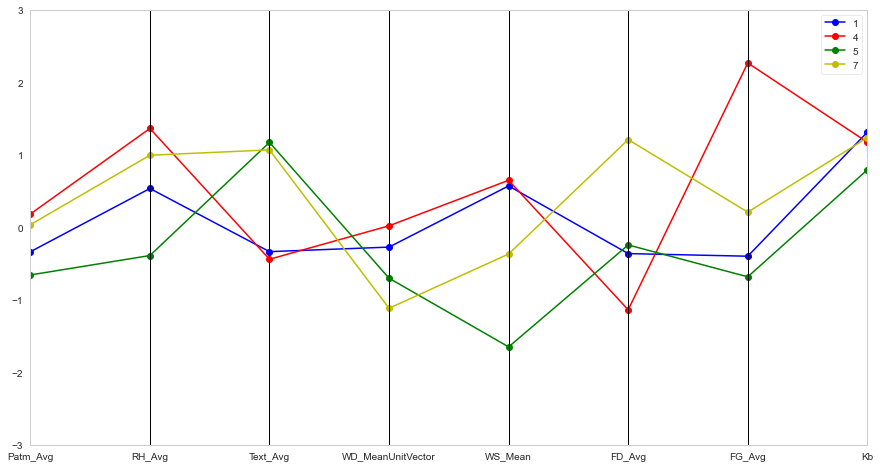

In [ ]:
parallel_plot(P[P['Kb'] > 0.5])

DAY ANALYSIS ON VA JUSTE AGGREGER EN JOUR

In [ ]:
possession_cluster = pd.read_csv("possession_2014_2015.csv")
possession_cluster["Kb"]=(possession_cluster["FG_Avg"]-possession_cluster["FD_Avg"])/possession_cluster["FG_Avg"]

possession_cluster['Timestamp'] = pd.to_datetime(possession_cluster['Timestamp'], format='%Y%m%d %H:%M:%S')

data_daily_possession_cluster = possession_cluster.resample('D',on='Timestamp').mean()

data_daily_possession_cluster=data_daily_possession_cluster[data_daily_possession_cluster["Kb"]>=0]
data_daily_possession_cluster=data_daily_possession_cluster[data_daily_possession_cluster["Kb"]<=1]

In [ ]:
data_daily_possession_cluster

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,Kb
Timestamp,,,,,,,,
2014-01-04,102.561238,269.003907,1006.159067,78.261156,26.388101,202.134713,1.744537,0.157669
2014-01-05,73.162226,323.037893,1008.645921,67.018401,26.935891,85.605432,2.352500,0.297316
2014-01-06,134.228356,190.194994,1009.182888,72.428332,26.820555,71.486256,2.903032,0.050786
2014-01-07,118.193183,198.548574,1007.978231,68.790866,27.043634,64.460464,2.832257,0.136916
2014-01-08,173.576623,294.764318,1008.868868,73.394837,27.072743,45.915869,2.911759,0.176876
...,...,...,...,...,...,...,...,...
2015-12-25,92.466656,281.203594,1013.431585,57.520541,28.193530,162.917500,1.677882,0.288402
2015-12-26,107.661090,206.168118,1012.019619,61.018423,27.327835,165.045783,1.707894,0.094358
2015-12-27,96.994571,286.098876,1011.799731,63.396977,27.346203,126.167035,2.042338,0.257560


In [ ]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

data_daily_possession_cluster = StandardScaler().fit_transform(data_daily_possession_cluster)

kmeans = KMeans(n_clusters=10)
model = kmeans.fit(data_daily_possession_cluster)##### d_stamp c'était les données de 2014
print("model\n", model)

model
 KMeans(n_clusters=10)


In [ ]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [ ]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
features=["Patm_Avg","RH_Avg","Text_Avg","WD_MeanUnitVector", "WS_Mean","FD_Avg","FG_Avg","Kb"]

In [ ]:
centers = model.cluster_centers_
centers

array([[ 0.4560252 , -0.11064349, -0.28765894,  0.22398729,  0.6883026 ,
         0.31417055, -0.35793362,  0.36232199],
       [-0.19375566, -1.30811766, -0.31461569,  1.06720131,  0.19908245,
        -0.33541621, -0.66705546, -0.59221326],
       [-0.23138267,  1.11881222, -0.7318234 , -0.38544658,  0.780333  ,
         0.62414817, -0.02341788,  1.39801138],
       [ 1.74392422,  0.41240584, -0.52421514,  0.40898374,  0.64641533,
        -1.86803006,  1.75354858, -0.11196596],
       [ 0.02769929,  1.17608886, -0.71895496,  0.50431431,  0.77747877,
        -1.09596714,  0.20970531,  1.21524217],
       [ 0.59938435,  0.43164373,  0.84608548, -0.68341941, -0.83784843,
         0.45771667, -0.13933001, -0.74514075],
       [-0.9188211 , -0.55130607,  0.40232716, -0.4025925 , -0.6631879 ,
         0.26606392, -0.00867123, -0.3209201 ],
       [-0.90364158, -0.3575029 ,  1.47303824, -1.13447404, -1.5928563 ,
         0.86681306, -0.27494881, -0.98127673],
       [ 1.51958313, -0.56531606

In [ ]:
P = pd_centers(features, centers)
P

,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,FD_Avg,FG_Avg,Kb,prediction
0,0.456025,-0.110643,-0.287659,0.223987,0.688303,0.314171,-0.357934,0.362322,0
1,-0.193756,-1.308118,-0.314616,1.067201,0.199082,-0.335416,-0.667055,-0.592213,1
2,-0.231383,1.118812,-0.731823,-0.385447,0.780333,0.624148,-0.023418,1.398011,2
3,1.743924,0.412406,-0.524215,0.408984,0.646415,-1.868030,1.753549,-0.111966,3
4,0.027699,1.176089,-0.718955,0.504314,0.777479,-1.095967,0.209705,1.215242,4
5,0.599384,0.431644,0.846085,-0.683419,-0.837848,0.457717,-0.139330,-0.745141,5
6,-0.918821,-0.551306,0.402327,-0.402593,-0.663188,0.266064,-0.008671,-0.320920,6
7,-0.903642,-0.357503,1.473038,-1.134474,-1.592856,0.866813,-0.274949,-0.981277,7
8,1.519583,-0.565316,-1.215429,1.195316,0.846546,-0.147470,-0.374918,-0.640477,8
9,-0.778166,1.263599,-0.134153,-0.208182,0.190010,-1.626337,2.850427,1.348489,9


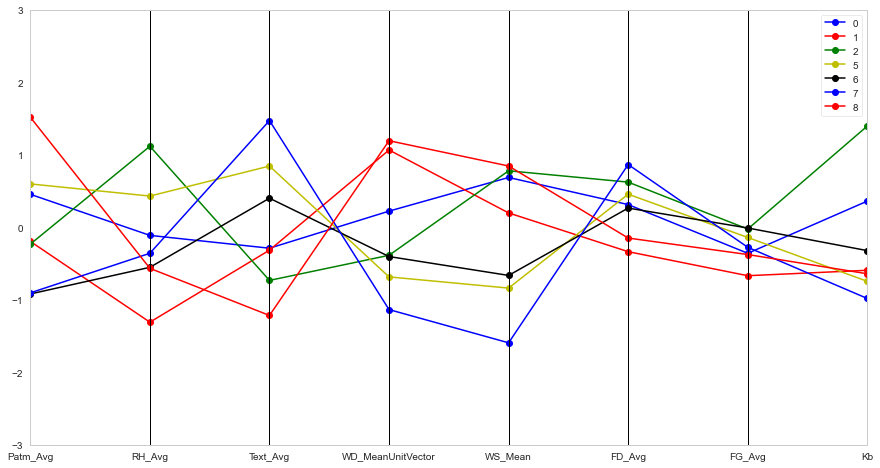

In [ ]:
parallel_plot(P[P['FG_Avg'] < 0])